# Proyecto Final

La finalidad de este proyecto es brindarte información y análisis que te permitan evaluar la viabilidad de comprar una casa en Barcelona, teniendo en cuenta los parámetros y criterios como metros cuadrados, distrito, estado de la propiedad, vistas, ascensor, y precio. El objetivo principal es proporcionarte orientación y apoyo en tu proceso de toma de decisiones de inversión inmobiliaria.

> _...A través de este proyecto, se realizará un análisis detallado del mercado inmobiliario en Barcelona, teniendo en cuenta factores como la ubicación, el tamaño de la vivienda, el precio, las tendencias del mercado y otros aspectos relevantes. Se recopilarán datos sobre la oferta y demanda de viviendas en diferentes áreas de Barcelona, así como información sobre los precios históricos y las perspectivas futuras.

# OBJETIVO:
El objetivo principal de este proyecto es utilizar herramientas y técnicas de análisis de datos para evaluar la rentabilidad potencial de la inversión en una casa en Barcelona. Esto incluirá cálculos de retorno de la inversión, estimaciones de crecimiento del valor de la propiedad y análisis de factores económicos y legales que puedan afectar el mercado inmobiliario y asi proporcionar una evaluación integral y fundamentada sobre la viabilidad de comprar una casa en Barcelona, considerando los parámetros y criterios específicos. Esto permitirá tomar decisiones informadas y maximizar oportunidades de inversión en el mercado inmobiliario de Barcelona.

## 1. Generar la pregunta de investigación

**Pregunta:** _"¿Cuál es el rango de precios más adecuado para buscar una casa en Barcelona que cumpla con mis requisitos y se ajuste a mi presupuesto?"

In [2]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

### Importar los datos

In [3]:
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

In [4]:
data.head()

,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
0,Gràcia,el Coll,3,252,0,230000,0,912
1,Nou Barris,la Prosperitat,2,53,0,49000,0,924
2,Nou Barris,Can Peguera,3,160,0,150000,0,937
3,Nou Barris,Verdun,4,130,0,130000,0,1000
4,Eixample,la Sagrada Família,4,350,0,390000,0,1114


In [5]:
data.tail(10)

,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
3255,Sant Martí,el Poblenou,2,134,1,1900000,0,14179
3256,Eixample,la Dreta de l'Eixample,2,150,1,2158000,0,14386
3257,Eixample,la Dreta de l'Eixample,3,114,1,1650000,0,14473
3258,Eixample,l'Antiga Esquerra de l'Eixample,4,204,1,2975000,0,14583
3259,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,4,130,1,1950000,0,15000
3260,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,4,132,1,1980000,0,15000
3261,Eixample,la Dreta de l'Eixample,2,145,1,2188000,0,15089
3262,Eixample,l'Antiga Esquerra de l'Eixample,3,90,1,1430000,0,15888
3263,Eixample,la Dreta de l'Eixample,3,140,1,2500000,0,17857
3264,Eixample,la Dreta de l'Eixample,4,600,1,12000000,0,20000


### Análisis descriptivo de las variables

In [943]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   rooms         3265 non-null   int64 
 3   area_m2       3265 non-null   int64 
 4   lift          3265 non-null   int64 
 5   prices        3265 non-null   int64 
 6   compra        3265 non-null   int64 
 7   eurometro     3265 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 204.2+ KB


**Muestra el número de filas/registros y columnas/variables del dataset.**

In [944]:
print(f'Tenemos {data.shape[0]} registros y {data.shape[1]} variables.')

Tenemos 3265 registros y 8 variables.


**Muestra el resumen estadístico de las variables numéricas del conjunto de datos.**

In [945]:
data.describe()

,rooms,area_m2,lift,prices,compra,eurometro
count,3265.000000,3265.000000,3265.000000,3.265000e+03,3265.000000,3265.000000
mean,3.160796,121.566616,0.835222,6.004200e+05,0.174579,4688.699541
std,1.325257,92.721515,0.371037,6.522661e+05,0.379665,1892.800545
min,1.000000,20.000000,0.000000,4.900000e+04,0.000000,912.000000
25%,2.000000,72.000000,1.000000,2.799000e+05,0.000000,3442.000000
50%,3.000000,93.000000,1.000000,4.190000e+05,0.000000,4333.000000
75%,4.000000,135.000000,1.000000,6.550000e+05,0.000000,5555.000000
max,13.000000,900.000000,1.000000,1.200000e+07,1.000000,20000.000000


In [946]:
data.describe(include=['O'])

,district,neighborhood
count,3265,3265
unique,10,65
top,Eixample,la Dreta de l'Eixample
freq,788,241


**Identifica y analiza la variable de salida. ¿Cuál es la variable de salida, es decir, cuál es la que vamos a tratar de predecir?**

In [947]:
# Hacemos un recuento de la variable de salida
print(data.columns)

# Asegurarse de que 'compra' esté en la lista de nombres de columnas
if 'compra' in data.columns:
    counts = data['compra'].value_counts(dropna=False)
    print(counts)
else:
    print("La columna 'compra' no existe en el DataFrame.")

Index(['district', 'neighborhood', 'rooms', 'area_m2', 'lift', 'prices',
       'compra', 'eurometro'],
      dtype='object')
0    2695
1     570
Name: compra, dtype: int64


In [948]:
sns.set_style('white')

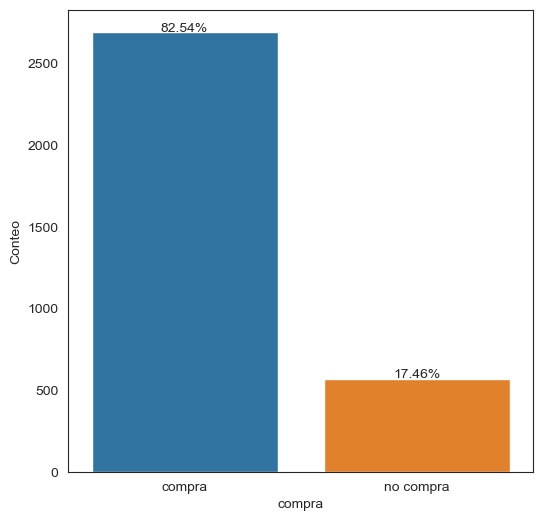

In [949]:
# Crea el count plot
fig = plt.figure(figsize=(6, 6))
ax = sns.countplot(x='compra', data=data)
ax.set_ylabel('Conteo')
ax.set_xticklabels(['compra', 'no compra'])

# Muestra los porcentajes en el gráfico
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / len(data) * 100),
            ha='center')


### Valores ausentes

**Comprueba qué variables tienen valores ausentes y cuántos. Muestra solo las variables que tienen valores ausentes.**

In [950]:
# Calculamos el número de valores ausentes
null_series = data.isnull().sum()

# Filtramos por las variables que tienen valores ausentes
null_series[null_series > 0]


Series([], dtype: int64)

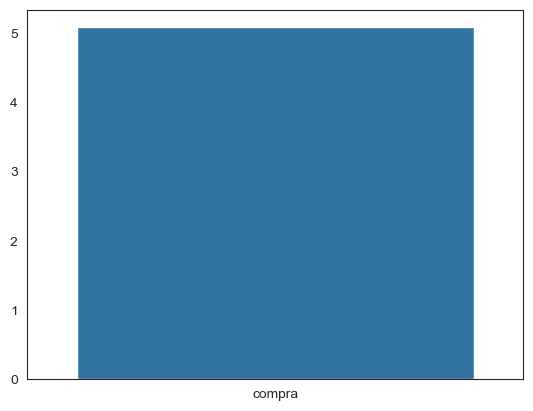

In [951]:
sns.barplot(x=null_series_p.index, y=null_series_p.values);

### Duplicados

**Comprueba si hay valores duplicados. ¿Crees que podemos eliminarlos sin más?**

In [952]:
data[data.duplicated(keep=False)]


,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
19,Nou Barris,la Trinitat Nova,2,76,0,125000,0,1644
20,Nou Barris,la Trinitat Nova,2,76,0,125000,0,1644
34,Nou Barris,la Prosperitat,3,77,0,139900,0,1816
35,Nou Barris,la Prosperitat,3,77,0,139900,0,1816
45,Sant Martí,el Besòs i el Maresme,2,52,0,99000,0,1903
...,...,...,...,...,...,...,...,...
3191,Eixample,la Dreta de l'Eixample,3,153,1,1495000,0,9771
3195,Eixample,la Dreta de l'Eixample,3,146,1,1430000,0,9794
3196,Eixample,la Dreta de l'Eixample,3,146,1,1430000,0,9794
3235,Sarrià-Sant Gervasi,les Tres Torres,3,200,1,2360000,0,11800


### Ajuste de los tipos de variables

In [953]:
data['prices'].unique()

array([  230000,    49000,   150000,   130000,   390000,    69000,
          87000,    95000,   279900,   219900,   490000,   199900,
         200000,   175000,   239000,   120000,   450000,   125000,
         103000,   176000,   299000,   129999,   135000,    80000,
         259000,   155000,   195000,   142900,  1250000,   139900,
         119000,   190000,    79000,    76000,    99000,   330000,
         145000,   265000,   132000,   365000,   260000,   119500,
         140000,   149000,   114900,   325000,   158000,   139000,
         165000,    93000,   141000,   137000,   189000,   129000,
         180000,   199000,   134900,   156000,  1700000,   630000,
         235000,   107000,   399000,   115000,   185000,   161500,
         830000,   160000,   169000,   270000,   275000,   699000,
         189900,   675000,   395000,   152000,   169900,   170000,
         215000,   177000,   250000,   178000,   210000,   240000,
        1150000,   118000,   162000,   220000,   142000,   225

In [954]:
data['district']

0           Gràcia
1       Nou Barris
2       Nou Barris
3       Nou Barris
4         Eixample
           ...    
3260    Sant Martí
3261      Eixample
3262      Eixample
3263      Eixample
3264      Eixample
Name: district, Length: 3265, dtype: object

In [955]:
# Cambiamos el capture_rate por '30'
type(data.loc[0, 'district'])

str

In [956]:
data[['district', 'neighborhood', 'lift']] = data[['district', 'neighborhood', 'lift']].apply(lambda x: pd.factorize(x.astype(str))[0])

In [957]:
print(data[['district', 'neighborhood', 'lift']].dtypes)

district        int64
neighborhood    int64
lift            int64
dtype: object


AttributeError: 'Legend' object has no attribute '_children'

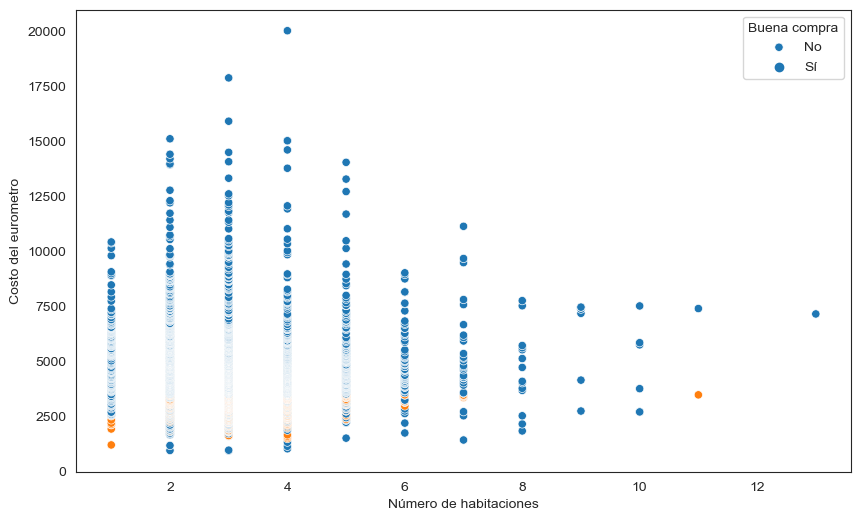

In [958]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el DataFrame 'data' con tus datos
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

# Scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data, x='rooms', y='eurometro', hue='compra')

# Configuración de ejes y leyenda
ax.set_xlabel('Número de habitaciones')
ax.set_ylabel('Costo del eurometro')
ax.legend(title='Buena compra', labels=['No', 'Sí'])

# Cambiar colores de los puntos
colors = {0: 'red', 1: 'blue'}
for lh in ax.legend_._children:
    lh.set_color(colors[lh.get_label()])

# Mostramos el número de registros en el gráfico
for p in ax.collections:
    height = p.get_sizes()[0]
    ax.text(p.get_offsets()[0][0], p.get_offsets()[0][1] + 50,
            '{}'.format(int(height)),
            ha='center')

# Mostrar el gráfico
plt.show()





In [ ]:
print(df_filtrado)

### Detección de valores atípicos

**Muestra la descripción de las siguientes variables numéricas:**

In [959]:
cols = ['district', 'neighborhood', 'rooms', 'area_m2', 'lift', 'prices', 'compra','eurometro']

numeric_cols = ['rooms', 'area_m2', 'prices']

numeric_data = data[numeric_cols]

description = numeric_data.describe()

print(description)


             rooms      area_m2        prices
count  3265.000000  3265.000000  3.265000e+03
mean      3.160796   121.566616  6.004200e+05
std       1.325257    92.721515  6.522661e+05
min       1.000000    20.000000  4.900000e+04
25%       2.000000    72.000000  2.799000e+05
50%       3.000000    93.000000  4.190000e+05
75%       4.000000   135.000000  6.550000e+05
max      13.000000   900.000000  1.200000e+07


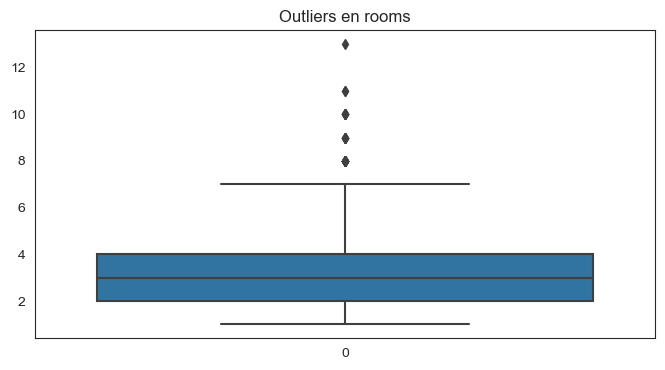

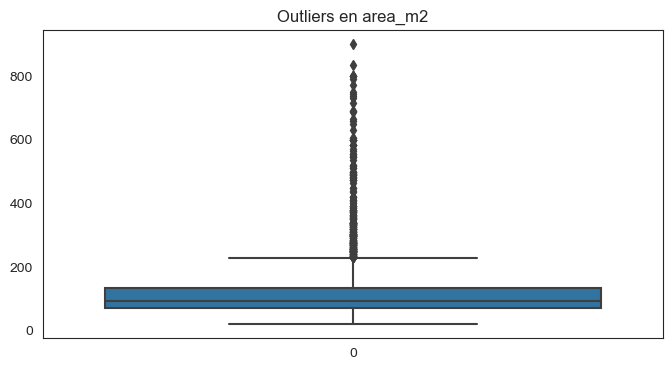

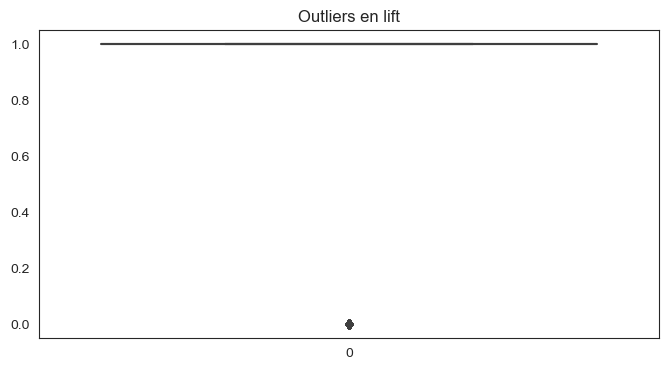

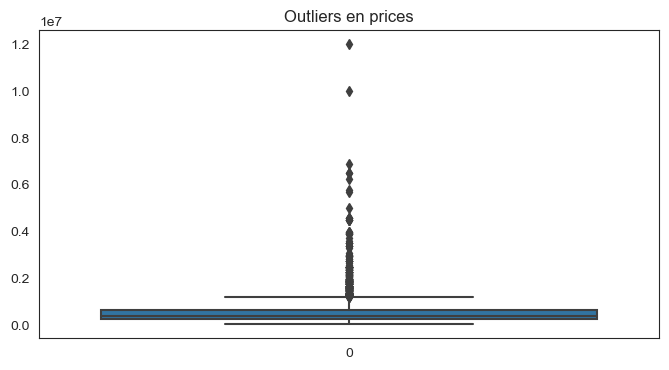

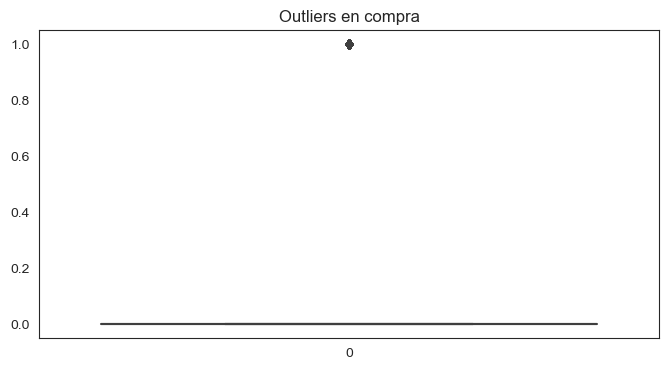

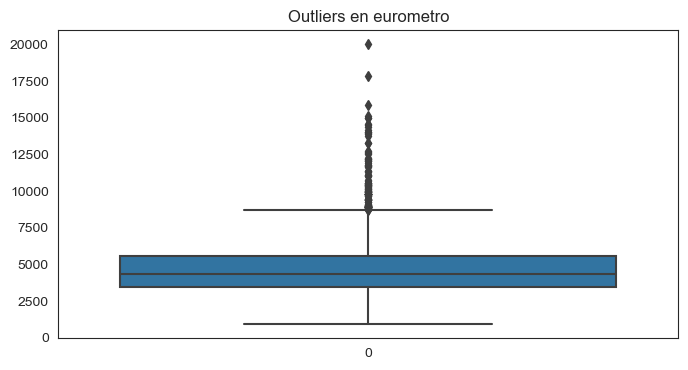

In [960]:
import pandas as pd
import seaborn as sns

# Cargar el DataFrame con tus datos
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include='number').columns

# Visualizar los outliers en cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data[column])
    plt.title(f'Outliers en {column}')
    plt.show()


In [961]:
import plotly.express as px
import plotly.graph_objects as go

# Crear el gráfico de puntos
fig = px.scatter(data, x='area_m2', y='prices')

# Personalizar el diseño del gráfico de puntos
fig.update_layout(
    title='Relación entre Área y Precios',
    xaxis_title='Área (m²)',
    yaxis_title='Precios'
)

# Identificar los outliers
Q1 = data['prices'].quantile(0.25)
Q3 = data['prices'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['prices'] < Q1 - 1.5 * IQR) | (data['prices'] > Q3 + 1.5 * IQR)]

# Añadir los outliers al gráfico de puntos
fig.add_trace(go.Scatter(x=outliers['area_m2'], y=outliers['prices'], mode='markers', 
                         marker=dict(color='red', size=8), name='Outliers'))

# Mostrar el gráfico de puntos
fig.show()


### Estudio de la correlación

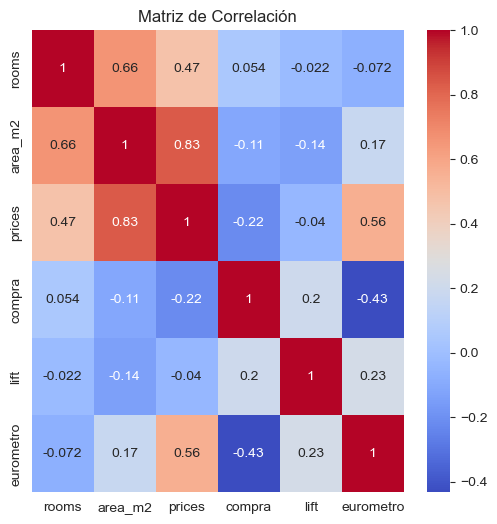

In [962]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_to_plot = ['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']

# Obtener la matriz de correlación
correlation_matrix = data[columns_to_plot].corr()

# Generar el mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


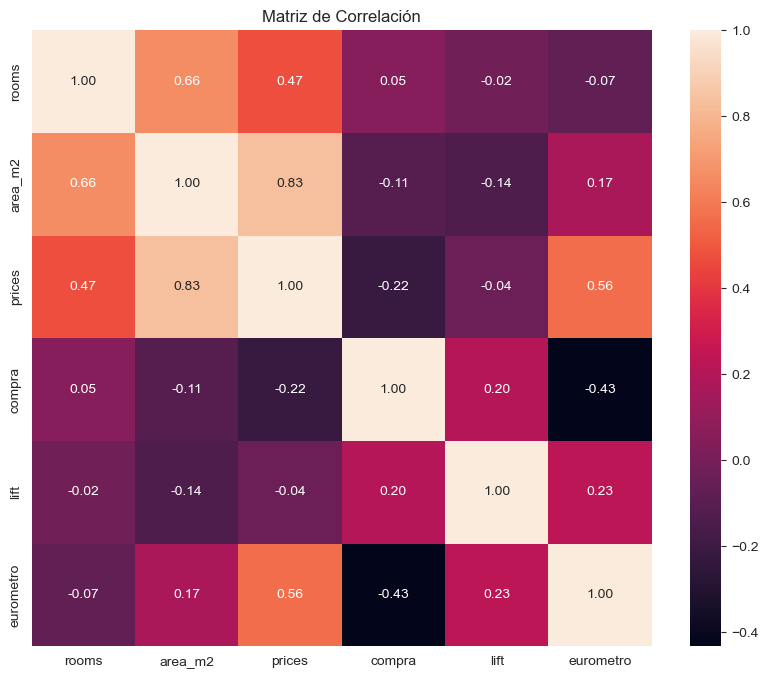

In [963]:
# Crea el mapa de calor con los índices de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Tamaño de la figura ajustado a (10, 8)
sns.heatmap(data[columns_to_plot].corr(), annot=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


**En base en a lo analizado hasta ahora, quédate con las columnas que consideres más informativas a efectos predictivos.**

In [964]:
data_f = data[['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']]

**Crea un mapa de calor que muestre cómo se correlacionan las características seleccionadas y la variable a predecir, ¿qué observas?**

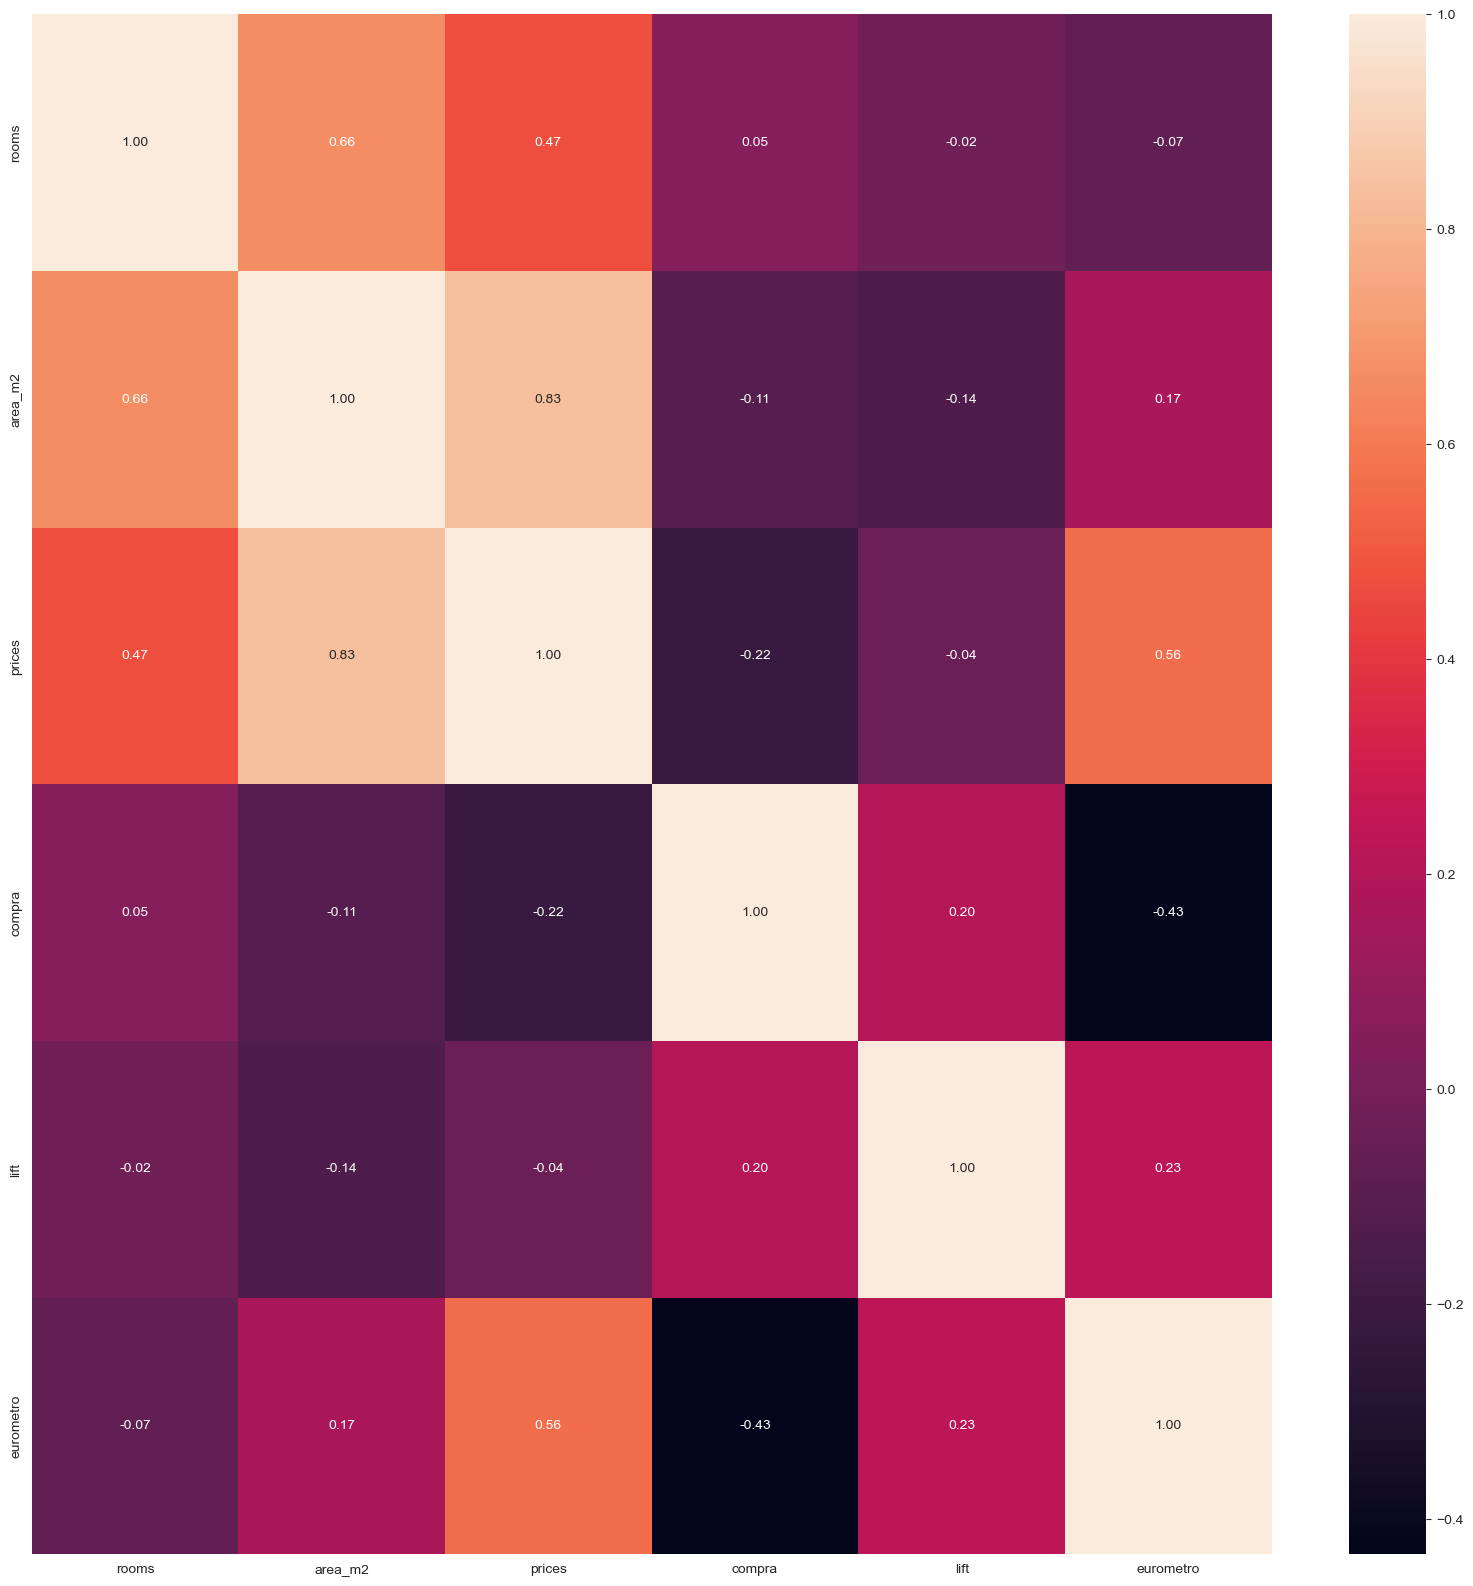

In [965]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_f.corr(), annot=True, fmt='.2f')
plt.yticks(va='center');

**Ahora que hemos seleccionado las características definitivas con las que vamos a entrenar nuestro modelo usan un _pair plot_ para mostrar su distribución en base a la variable de salida. Guarda la imagen en forma de PNG para poder visualizarla mejor.**

Un _pair plot_ muestra la relación bivariada entre cada par de características, es decir, crea gráficos con todas las combinaciones posibles de columnas numéricas.

In [966]:
data_f = data[['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']]

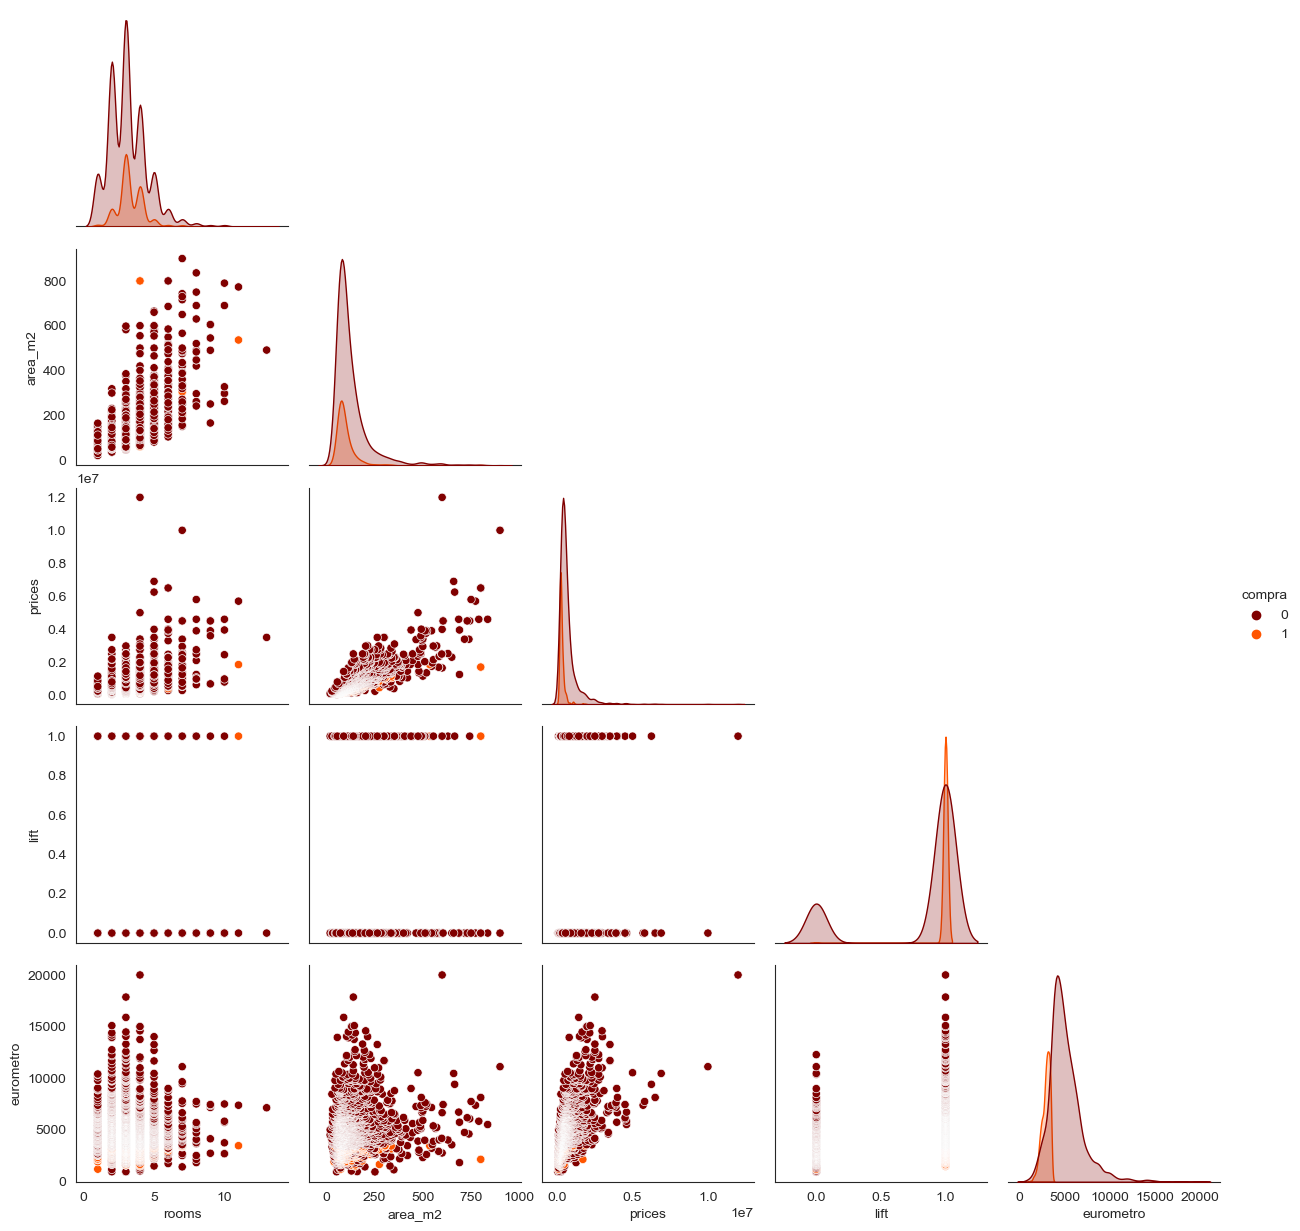

In [967]:
# Creamos el pair plot
sns.pairplot(data_f, hue='compra', palette='gist_heat', corner=True)
plt.savefig('compra_pair_plot.png');

## 4. División conjuntos de entrenamiento y prueba

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

In [968]:
X = data_f.drop('compra', axis=1)
y = data_f['compra']

In [969]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [970]:
# Instancia el escalador 
scaler = MinMaxScaler()

# Escala los datos
X_train_scaled = scaler.fit_transform(X_train)

In [971]:
# Recrea el dataset de entrenamiento con las columnas estandarizadas
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train.head()

,rooms,area_m2,prices,lift,eurometro
0,0.2,0.113971,0.051000,1.0,0.142975
1,0.3,0.205882,0.085258,1.0,0.133585
2,0.2,0.045343,0.017982,1.0,0.116341
3,0.3,0.158088,0.141218,1.0,0.325873
4,0.2,0.104167,0.159045,1.0,0.550050


In [972]:
# Escala el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

In [973]:
# Recrea el dataset de prueba con las columnas estandarizadas
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test.head()

,rooms,area_m2,prices,lift,eurometro
0,0.4,0.171569,0.111766,1.0,0.229611
1,0.1,0.105392,0.054410,1.0,0.168251
2,0.2,0.082108,0.080763,1.0,0.332310
3,0.2,0.089461,0.050535,1.0,0.183547
4,0.4,0.223039,0.178422,1.0,0.296226


In [974]:
# Instancia el clasificador
lr = LogisticRegression(max_iter=10000,random_state=42)

# Entrena el clasificador
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [975]:
# Imprime la exactitud en los set de entrenamiento y prueba
print(f'Accuracy of LR on training set: {lr.score(X_train, y_train):.2f}')
print(f'Accuracy of LR on test set: {lr.score(X_test, y_test):.2f}')

Accuracy of LR on training set: 0.90
Accuracy of LR on test set: 0.91


In [976]:
# Realiza las predicciones
y_pred_lr = lr.predict(X_test)

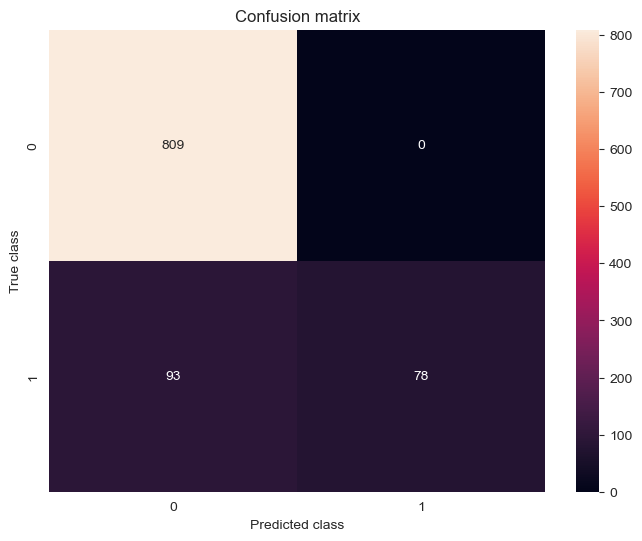

In [977]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [978]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       809
           1       1.00      0.46      0.63       171

    accuracy                           0.91       980
   macro avg       0.95      0.73      0.79       980
weighted avg       0.91      0.91      0.89       980



In [979]:
new_data = {
    "name": ["1"],
    "rooms": ["2"],
    "area_m2": ["200"],
    "prices": ["30000"],
    "lift": ['1'],
    "eurometro" : ["1500"]
}

# Calcula el valor de la nueva clave "eurometro" como entero
# new_data["eurometro"] = int(new_data["prices"][0]) // int(new_data["area_m2"][0])

# Imprime el diccionario actualizado
print(new_data)





{'name': ['1'], 'rooms': ['2'], 'area_m2': ['200'], 'prices': ['30000'], 'lift': ['1'], 'eurometro': ['1500']}


In [980]:
# Crea un DataFrame con los nuevos datos
new_df = pd.DataFrame(new_data)

# Establece 'name' como índice
new_df.set_index('name', inplace=True)
new_df

,rooms,area_m2,prices,lift,eurometro
name,,,,,
1,2,200,30000,1,1500


In [981]:
# Escala los datos
new_df_scaled = scaler.transform(new_df)

In [982]:
# Recrea el dataset de prueba con las columnas estandarizadas
new_df = pd.DataFrame(new_df_scaled, 
                      columns=new_df.columns, 
                      index=new_df.index)
new_df.head()

,rooms,area_m2,prices,lift,eurometro
name,,,,,
1,0.1,0.220588,-0.002945,1.0,0.034016


In [983]:
leyenda = {1: 'COMPRA RECOMENDABLE',
           0: 'COMPRA NO RECOMENDABLE'}

In [984]:
# Haz las predicciones
y_new = lr.predict(new_df)

# Imprime los resultados
for i in range(len(new_df)):
    print(f"{new_df.index[i]} es una {leyenda[y_new[i]]}.")

1 es una COMPRA RECOMENDABLE.


In [985]:
# from sklearn.linear_model import LogisticRegression
# import joblib

# # Crear y entrenar el modelo
# model = LogisticRegression()
# # ...

# # Guardar el modelo en un archivo
# joblib.dump(model, 'modelo_logistic_regression.joblib')

# # Cargar el modelo desde el archivo
# loaded_model = joblib.load('modelo_logistic_regression.joblib')

# # Utilizar el modelo cargado para hacer predicciones
# # ...


In [938]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_iris
# import joblib
# import numpy as np

# iris = load_iris()
# X_train = iris.data
# y_train = iris.target

# # Instanciar y ajustar el modelo
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)

# # Guardar el modelo entrenado
# joblib.dump(lr, 'modelo_entrenado.joblib')

# # Cargar el modelo entrenado
# loaded_model = joblib.load('modelo_entrenado.joblib')

# # Datos para hacer la predicción
# new_data = {
#     "name": ["1"],
#     "rooms": ["2"],
#     "area_m2": ["200"],
#     "prices": ["30000"],
#     "lift": ['1'],
#     "eurometro" : ["150"]
# }

# # Convertir los valores a tipos numéricos
# new_data = {key: np.array(value).astype(float) for key, value in new_data.items()}

# # Convertir los datos a una matriz 2D
# X_new = np.array(list(new_data.values())).reshape(1, -1)

# # Ajustar el modelo nuevamente con los datos de entrenamiento
# loaded_model.fit(X_train, y_train)

# # Realizar la predicción
# prediction = loaded_model.predict(X_new)

# # Imprimir la predicción
# print(prediction)
